In [1]:
import torch
def predict(model, inputs, device):
    
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # No gradient calculation during testing

        inputs= inputs.to(device)

        # Forward pass
        outputs = model(inputs)

        # Assuming binary segmentation, apply sigmoid to the output
        predicted = torch.sigmoid(outputs) > 0.5  # Threshold for binary segmentation

    return predicted

In [16]:
from unet import UNet
from dataloader import PreprocessData
import os

model = UNet(3, 6)
model = model.to("cuda")
model.load_state_dict(torch.load("models/best_model_1_epoch.pth"))
image_list = os.listdir("qual_test")
preprocessor = PreprocessData(root_dir = 'qual_test', images_list = image_list, resize = (32,32))
images = preprocessor.preprocess()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_26352\2625291874.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("models/best_model_1_epoch.

In [17]:
predicted = predict(model, images, torch.device("cuda"))

In [18]:
predicted.shape

torch.Size([3, 6, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.2914162].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6051416].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9124069..2.622571].


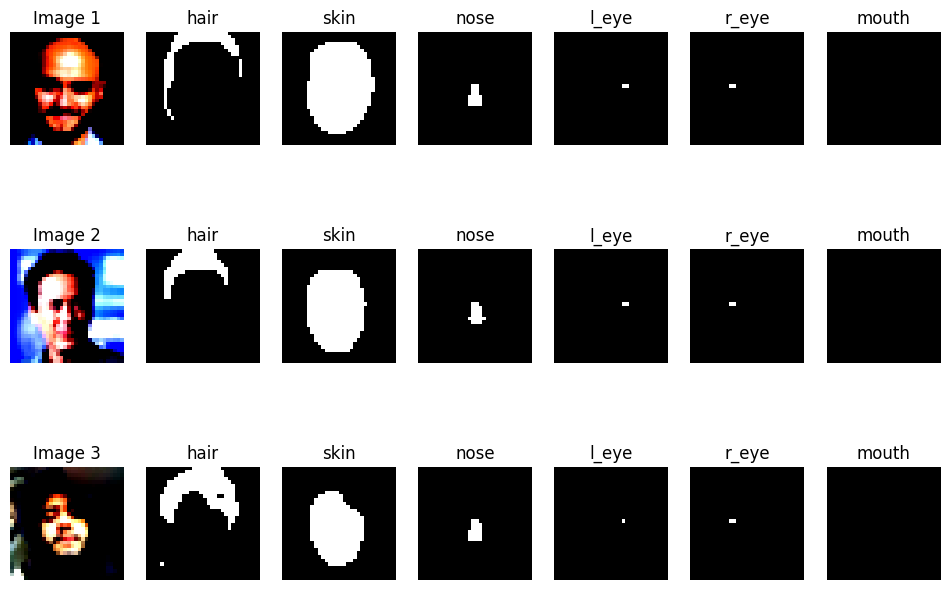

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(3, 7, figsize=(12, 8))
mask_types = [
            'hair', 'skin', 
            'nose', 
            'l_eye','r_eye'
            ,'mouth']
for i in range(3):
    ax[i, 0].imshow(images[i].permute(1, 2, 0).cpu().numpy())
    ax[i, 0].axis('off')
    ax[i, 0].set_title(f"Image {i+1}")
    for j in range(1,7):
        ax[i, j].imshow(predicted[i, j-1].cpu().numpy(), cmap='gray')
        ax[i, j].axis('off')
        ax[i, j].set_title(f"{mask_types[j-1]}")